## Séries Temporais
Acompanhando o curso do [https://didatica.tech](https://didatica.tech/curso-aprendizado-por-reforco-algoritmos-geneticos-nlp-e-gans/)

## Utilizando o método Window
Neste exemplo iremos transformar um problema temporal num problema não temporal.

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1' # Desabilita o uso de GPUs

In [2]:
dataset = pd.read_csv('./data/AirPassengers.csv')
dataset.columns = ['month', 'passengers']

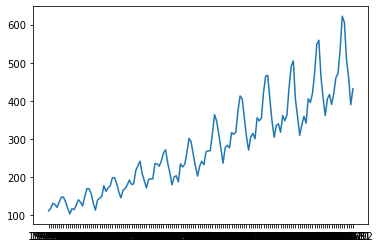

In [3]:
plt.plot(dataset['month'], dataset['passengers'])
plt.show()

In [4]:
# Separando os dados entre treino e teste
# Vamos separar 33% para teste. Em vez de coletar amostras aleatoriamente com a função trains_test_split, iremos coletar do início
# até 67% dos dados para treino e deixar o final para teste.
tamanho_treino = int(len(dataset) * 0.67)
treino, teste = dataset[:tamanho_treino], dataset[tamanho_treino:]
teste = teste.reset_index(drop=True) # como depois iremos usar o comando ".loc", precisaremos que os indices estejam inciando em .
teste.head()

,month,passengers
0,1957-01,315
1,1957-02,301
2,1957-03,356
3,1957-04,348
4,1957-05,355


In [5]:
def gera_dataset(_dataset, _tamanho_janela = 1):
    X, y = [], []
    for i in range(len(_dataset) - _tamanho_janela):
        X.append(_dataset[i:(i+_tamanho_janela)]['passengers'].values) # armazena todos os dados localizados na linha i até i+tamanho_janela
        y.append(_dataset.loc[[i+_tamanho_janela]]['passengers'].values) # armazena apenas o dado localizado na linha i+tamanho_janela
    return np.asarray(X, dtype=np.float32), np.asarray(y, dtype=np.float32)

In [6]:
# Aplicando a função nos datasets de treino e teste que já criamos:
tamanho_janela = 1
X_treino, y_treino = gera_dataset(treino, tamanho_janela)
X_teste, y_teste = gera_dataset(teste, tamanho_janela)

In [7]:
# Neste exemplo estamos usando o tamanho_janela igual a 1,
# ou seja, iremos usar apenas um dado para prever o próximo.
X_treino[:1], y_treino[:1]

(array([[112.]], dtype=float32), array([[118.]], dtype=float32))

In [8]:
# Criando o modelo MPL com o número de neurônios de entrada = tamanho_janela
# 1 camada oculta de 8 neurônios e uma camada de saída com 1 neurônio.
modelo = Sequential()

# Camada de entrada + camada oculta
modelo.add(Dense(8, input_shape=(tamanho_janela,), activation='relu'))

# Camada de saída
modelo.add(Dense(1, kernel_initializer='normal', activation='linear'))

# Compilando o modelo
modelo.compile(loss='mean_squared_error', optimizer='adam')

In [9]:
# Treinando o modelo
modelo.fit(X_treino, y_treino, epochs=300, batch_size=5, verbose=2)
# O objetivo é treinar a rede para prever o próximo valor.
# Isso significa que uma entrada X tem como valor correto Y o próximo elemento.

Epoch 1/300
19/19 - 0s - loss: 47035.2891 - 219ms/epoch - 12ms/step
Epoch 2/300
19/19 - 0s - loss: 45042.8008 - 11ms/epoch - 580us/step
Epoch 3/300
19/19 - 0s - loss: 43019.4492 - 10ms/epoch - 523us/step
Epoch 4/300
19/19 - 0s - loss: 40869.7734 - 10ms/epoch - 528us/step
Epoch 5/300
19/19 - 0s - loss: 38551.5703 - 10ms/epoch - 529us/step
Epoch 6/300
19/19 - 0s - loss: 36141.7734 - 10ms/epoch - 524us/step
Epoch 7/300
19/19 - 0s - loss: 33726.2383 - 9ms/epoch - 472us/step
Epoch 8/300
19/19 - 0s - loss: 31112.7148 - 10ms/epoch - 525us/step
Epoch 9/300
19/19 - 0s - loss: 28588.8125 - 10ms/epoch - 526us/step
Epoch 10/300
19/19 - 0s - loss: 25951.9746 - 9ms/epoch - 472us/step
Epoch 11/300
19/19 - 0s - loss: 23421.1797 - 10ms/epoch - 526us/step
Epoch 12/300
19/19 - 0s - loss: 20914.5059 - 9ms/epoch - 485us/step
Epoch 13/300
19/19 - 0s - loss: 18496.7441 - 9ms/epoch - 472us/step
Epoch 14/300
19/19 - 0s - loss: 16237.5000 - 9ms/epoch - 495us/step
Epoch 15/300
19/19 - 0s - loss: 14044.4326 - 9ms

In [10]:
# Estimando a performance do modelo
# Primeiro iremos estimar a performance do modelo com os dados de treino
# e depois iremos estimar a performance com os dados de teste.
# Para isso iremos usar a função modelo.evaluate()
# O modelo.evaluate() retorna a loss e a accuracy do modelo.
# A loss é a quantidade de erros que o modelo encontrou.
# A accuracy é a quantidade de acertos que o modelo encontrou.

def estima_performance(model, X_train, y_train, X_test, y_test):
    mse_train = model.evaluate(X_train, y_train, verbose=0)
    mse_test = model.evaluate(X_test, y_test, verbose=0)
    print('Score em treino: {:.2f} MSE ({:.2f} RMSE)'.format(mse_train, math.sqrt(mse_train)))
    print('Score em teste: {:.2f} MSE ({:.2f} RMSE)'.format(mse_test, math.sqrt(mse_test)))

    return mse_train, mse_test

In [11]:
# Usando como base o resultado do teste (RMSE = 48.43), então nosso modelo está errando em torno de 48.43 para mais ou para menos.
# Aproximadamente 48.000 passageiros.

estima_performance(modelo, X_treino, y_treino, X_teste, y_teste)
# Tomando a raiz quadrada das estimativas de de3sempenho, podemos ver que o modelo tem um erro médio de 23 passageiros (em milhares)
# no conjunto de dados de treino e 48 (em milhares) passageiros no conjunto de dados de teste.

Score em treino: 539.75 MSE (23.23 RMSE)
Score em teste: 2346.23 MSE (48.44 RMSE)


(539.7540893554688, 2346.22705078125)

In [12]:
# Aumentando o tamanho da janela
# Vamos aumentar o tamanho da janela para 30.
tamanho_janela = 30
X_treino, y_treino = gera_dataset(treino, tamanho_janela)
X_teste, y_teste = gera_dataset(teste, tamanho_janela)

In [13]:
# Criando o modelo MPL com o número de neurônios de entrada = tamanho_janela
# 1 camada oculta de 8 neurônios e uma camada de saída com 1 neurônio.
modelo = Sequential()

# Camada de entrada + camada oculta
modelo.add(Dense(8, input_shape=(tamanho_janela,), activation='relu'))

# Camada de saída
modelo.add(Dense(1, kernel_initializer='normal', activation='linear'))

# Compilando o modelo
modelo.compile(loss='mean_squared_error', optimizer='adam')

In [14]:
# Treinando o modelo
modelo.fit(X_treino, y_treino, epochs=1000, batch_size=5, verbose=2)

Epoch 1/1000
14/14 - 0s - loss: 56502.3086 - 201ms/epoch - 14ms/step
Epoch 2/1000
14/14 - 0s - loss: 43736.7148 - 8ms/epoch - 571us/step
Epoch 3/1000
14/14 - 0s - loss: 29126.3320 - 7ms/epoch - 500us/step
Epoch 4/1000
14/14 - 0s - loss: 14551.2822 - 8ms/epoch - 597us/step
Epoch 5/1000
14/14 - 0s - loss: 5187.8232 - 7ms/epoch - 502us/step
Epoch 6/1000
14/14 - 0s - loss: 2129.3423 - 7ms/epoch - 500us/step
Epoch 7/1000
14/14 - 0s - loss: 2062.0461 - 8ms/epoch - 571us/step
Epoch 8/1000
14/14 - 0s - loss: 1997.1683 - 7ms/epoch - 502us/step
Epoch 9/1000
14/14 - 0s - loss: 1924.9825 - 8ms/epoch - 570us/step
Epoch 10/1000
14/14 - 0s - loss: 1890.6406 - 8ms/epoch - 571us/step
Epoch 11/1000
14/14 - 0s - loss: 1883.3898 - 9ms/epoch - 643us/step
Epoch 12/1000
14/14 - 0s - loss: 1851.4285 - 8ms/epoch - 571us/step
Epoch 13/1000
14/14 - 0s - loss: 1839.8035 - 7ms/epoch - 498us/step
Epoch 14/1000
14/14 - 0s - loss: 1825.6571 - 8ms/epoch - 573us/step
Epoch 15/1000
14/14 - 0s - loss: 1820.7993 - 7ms/epo

In [15]:
# Usando como base o resultado do teste (RMSE = 14.60 ), agora nosso modelo está errando em torno de 14 (em milhares) para mais ou para menos.

estima_performance(modelo, X_treino, y_treino, X_teste, y_teste)
# Tomando a raiz quadrada das estimativas de desempenho, podemos observar que o modelo tem um erro médio de 8 passageiros (em milhares)
# no conjunto de dados de treino e 14 (em milhares) passageiros no conjunto de dados de teste.

Score em treino: 67.35 MSE (8.21 RMSE)
Score em teste: 443.52 MSE (21.06 RMSE)


(67.34831237792969, 443.5245056152344)

## Utilizando a LSTM
Agora iremos utilizar uma rede LSTM (Long Short-Term Memory) para prever o próximo valor.
Agora sim iremos trabalhar de forma temporal

In [16]:
# Utilizando LSTM
from keras.layers import LSTM

In [17]:
from sklearn.preprocessing import MinMaxScaler

# É recomendado que sempre que for utilizar a LSTM os dados sejam normalizados.
# Para isso iremos utilizar o MinMaxScaler.
# O MinMaxScaler normaliza os dados de forma que o valor mínimo seja 0 e o valor máximo, seja 1.
scaler = MinMaxScaler(feature_range=(0, 1))
dataset['passengers'] = scaler.fit_transform(dataset['passengers'].values.reshape(-1, 1))
tamanho_treino = int(len(dataset) * 0.67)

treino, teste = dataset[:tamanho_treino], dataset[tamanho_treino:]
teste = teste.reset_index(drop=True)

In [18]:
# Aplicando a função para separar em variaveis X e y nos datasets de treino e teste
tamanho_janela = 1
x_treino, y_treino = gera_dataset(treino, _tamanho_janela=tamanho_janela)
x_teste, y_teste = gera_dataset(teste, _tamanho_janela=tamanho_janela)

In [19]:
# Reshape do input
# LSTM espera receber os dados em um format específico
x_treino = np.reshape(x_treino, (x_treino.shape[0], 1, x_treino.shape[1])) # Pega o dataset x_treino e coloca no formato:
# [n_amostras, n_timesteps, n_features]. O resultado dessa operação será os dados do dataset x_treino com essas 3 dimensões.
x_teste = np.reshape(x_teste, (x_teste.shape[0], 1, x_teste.shape[1]))

In [20]:
# Novo shape de entrada
# [n_amostras, n_timesteps, n_features]
display(x_treino.shape)
x_teste.shape

(95, 1, 1)

(47, 1, 1)

In [21]:
# Criando o modelo LSTM
modelo = Sequential()
modelo.add(LSTM(4, input_shape=(1,1))) # O primeiro parâmetro é a quantidade de neurônios ocultos
# Em input_shape nós precisamos informar apenas 2 valores:
# n_timesteps e n_features da variável X (entrada).

modelo.add(Dense(1)) # Saída da LSTM
modelo.compile(loss='mean_squared_error', optimizer='adam')

In [22]:
# Treinamento
modelo.fit(x_treino, y_treino, epochs=300, batch_size=5, verbose=2)

Epoch 1/300
19/19 - 1s - loss: 0.0681 - 842ms/epoch - 44ms/step
Epoch 2/300
19/19 - 0s - loss: 0.0547 - 14ms/epoch - 737us/step
Epoch 3/300
19/19 - 0s - loss: 0.0442 - 13ms/epoch - 684us/step
Epoch 4/300
19/19 - 0s - loss: 0.0363 - 14ms/epoch - 737us/step
Epoch 5/300
19/19 - 0s - loss: 0.0304 - 13ms/epoch - 684us/step
Epoch 6/300
19/19 - 0s - loss: 0.0261 - 14ms/epoch - 737us/step
Epoch 7/300
19/19 - 0s - loss: 0.0230 - 13ms/epoch - 684us/step
Epoch 8/300
19/19 - 0s - loss: 0.0208 - 14ms/epoch - 737us/step
Epoch 9/300
19/19 - 0s - loss: 0.0196 - 14ms/epoch - 738us/step
Epoch 10/300
19/19 - 0s - loss: 0.0186 - 14ms/epoch - 738us/step
Epoch 11/300
19/19 - 0s - loss: 0.0179 - 15ms/epoch - 791us/step
Epoch 12/300
19/19 - 0s - loss: 0.0175 - 14ms/epoch - 735us/step
Epoch 13/300
19/19 - 0s - loss: 0.0172 - 15ms/epoch - 790us/step
Epoch 14/300
19/19 - 0s - loss: 0.0168 - 14ms/epoch - 737us/step
Epoch 15/300
19/19 - 0s - loss: 0.0164 - 15ms/epoch - 790us/step
Epoch 16/300
19/19 - 0s - loss: 0.

In [23]:
from sklearn.metrics import mean_squared_error

# Previsões
previsao_treino = modelo.predict(x_treino)
previsao_teste = modelo.predict(x_teste)

# Inverte as previsões por conta da normalização
previsao_treino = scaler.inverse_transform(previsao_treino)
y_treino = scaler.inverse_transform(y_treino)

previsao_teste = scaler.inverse_transform(previsao_teste)
y_teste = scaler.inverse_transform(y_teste)

# Calcula o RMSE
score_treino = math.sqrt(mean_squared_error(y_treino, previsao_treino))
score_teste = math.sqrt(mean_squared_error(y_teste, previsao_teste))

print('Score em Treino {:.2f} RMSE'.format(score_treino))
print('Score em Teste {:.2f} RMSE'.format(score_teste))

Score em Treino 22.76 RMSE
Score em Teste 51.00 RMSE


### Aplicando LSTM com window (10)

In [24]:
# Aplicando LSTM com window:

tamanho_janela = 10
x_treino, y_treino = gera_dataset(treino, _tamanho_janela=tamanho_janela)
x_teste, y_teste = gera_dataset(teste, _tamanho_janela=tamanho_janela)

# Reshape do input
x_treino = np.reshape(x_treino, (x_treino.shape[0], 1, x_treino.shape[1])) # Pega o dataset x_treino e coloca no formato:
# [n_amostras, n_timesteps, n_features]. O resultado dessa operação será os dados do dataset x_treino com essas 3 dimensões.
x_teste = np.reshape(x_teste, (x_teste.shape[0], 1, x_teste.shape[1]))

# Criando o modelo LSTM
modelo = Sequential()
modelo.add(LSTM(4, input_shape= (1, x_treino.shape[2]))) # O primeiro parâmetro é a quantidade de neurônios ocultos
# Em input_shape nós precisamos informar apenas 2 valores: n_timesteps e n_features da variável x (entrada).
# Obs: repare que o início do código, lgo após aplicar a função create_dataset, x_treino e x_teste possuem duas dimensões,
# por isso que pegamos as features com x_treino.shape[1]. Depois fazemos um reshape, por isso que pegamos as fatures de x_treino
# no LSTM com x_treino.shape[2], pois essa informação está na 3ª dimensão agora.

modelo.add(Dense(1)) # Saída LSTM
modelo.compile(loss= 'mean_squared_error', optimizer='adam')

In [25]:
x_treino.shape

(86, 1, 10)

In [26]:
modelo.fit(x_treino, y_treino, batch_size=5, epochs=300, verbose=2)

Epoch 1/300
18/18 - 1s - loss: 0.0512 - 1s/epoch - 57ms/step
Epoch 2/300
18/18 - 0s - loss: 0.0350 - 16ms/epoch - 889us/step
Epoch 3/300
18/18 - 0s - loss: 0.0233 - 15ms/epoch - 833us/step
Epoch 4/300
18/18 - 0s - loss: 0.0153 - 15ms/epoch - 833us/step
Epoch 5/300
18/18 - 0s - loss: 0.0105 - 15ms/epoch - 833us/step
Epoch 6/300
18/18 - 0s - loss: 0.0083 - 15ms/epoch - 833us/step
Epoch 7/300
18/18 - 0s - loss: 0.0075 - 16ms/epoch - 889us/step
Epoch 8/300
18/18 - 0s - loss: 0.0073 - 16ms/epoch - 889us/step
Epoch 9/300
18/18 - 0s - loss: 0.0071 - 17ms/epoch - 944us/step
Epoch 10/300
18/18 - 0s - loss: 0.0069 - 17ms/epoch - 944us/step
Epoch 11/300
18/18 - 0s - loss: 0.0067 - 15ms/epoch - 833us/step
Epoch 12/300
18/18 - 0s - loss: 0.0066 - 16ms/epoch - 889us/step
Epoch 13/300
18/18 - 0s - loss: 0.0065 - 15ms/epoch - 833us/step
Epoch 14/300
18/18 - 0s - loss: 0.0063 - 16ms/epoch - 889us/step
Epoch 15/300
18/18 - 0s - loss: 0.0062 - 16ms/epoch - 889us/step
Epoch 16/300
18/18 - 0s - loss: 0.006

In [27]:
from sklearn.metrics import mean_squared_error

# Previsões
previsao_treino = modelo.predict(x_treino)
previsao_teste = modelo.predict(x_teste)

# Inverte as previsões por conta da normalização
previsao_treino = scaler.inverse_transform(previsao_treino)
y_treino = scaler.inverse_transform(y_treino)

previsao_teste = scaler.inverse_transform(previsao_teste)
y_teste = scaler.inverse_transform(y_teste)

# Calcula o RMSE
score_treino = math.sqrt(mean_squared_error(y_treino, previsao_treino))
score_teste = math.sqrt(mean_squared_error(y_teste, previsao_teste))

print('Score em Treino {:.2f} RMSE'.format(score_treino))
print('Score em Teste {:.2f} RMSE'.format(score_teste))

# Aparemente estamos com um problema de overfitting, pois o nosso modelo está com um score muito baixo no treino e alto no Teste.
#

Score em Treino 18.30 RMSE
Score em Teste 40.57 RMSE


### Separando Features de Timesteps
Aplicando LSTM com timesteps:

In [28]:
# Separando Features de Timesteps
# Aplicando LSTM com timesteps:

# Aplicando LSTM com window:

tamanho_janela = 10
x_treino, y_treino = gera_dataset(treino, _tamanho_janela=tamanho_janela)
x_teste, y_teste = gera_dataset(teste, _tamanho_janela=tamanho_janela)

# Reshape do input
# Agora estamos invertendo a quantidade de timesteps e a quantidade de fatures
# Neste exemplo temos 10 amostra aninhadas no tempo, ou seja, cada amostra tem uma ligação temporal com amostra anterior
# E cada uma dessas amostras tem somente 1 feature.
x_treino = np.reshape(x_treino, (x_treino.shape[0], x_treino.shape[1], 1)) # Pega o dataset x_treino e coloca no formato:
# [n_amostras, n_timesteps, n_features]. O resultado dessa operação será os dados do dataset x_treino com essas 3 dimensões.
x_teste = np.reshape(x_teste, (x_teste.shape[0], x_teste.shape[1], 1))

# Criando o modelo LSTM
modelo = Sequential()
modelo.add(LSTM(4, input_shape= (x_treino.shape[1], 1))) # O primeiro parâmetro é a quantidade de neurônios ocultos
# Em input_shape nós precisamos informar apenas 2 valores: n_timesteps e n_features da variável x (entrada).
# Obs: repare que o início do código, lgo após aplicar a função create_dataset, x_treino e x_teste possuem duas dimensões,
# por isso que pegamos as features com x_treino.shape[1]. Depois fazemos um reshape, por isso que pegamos as fatures de x_treino
# no LSTM com x_treino.shape[2], pois essa informação está na 3ª dimensão agora.

modelo.add(Dense(1)) # Saída LSTM
modelo.compile(loss= 'mean_squared_error', optimizer='adam')

In [29]:
modelo.fit(x_treino, y_treino, epochs=200, batch_size=5, verbose=2)

Epoch 1/200
18/18 - 1s - loss: 0.0886 - 1s/epoch - 62ms/step
Epoch 2/200
18/18 - 0s - loss: 0.0616 - 34ms/epoch - 2ms/step
Epoch 3/200
18/18 - 0s - loss: 0.0442 - 34ms/epoch - 2ms/step
Epoch 4/200
18/18 - 0s - loss: 0.0311 - 37ms/epoch - 2ms/step
Epoch 5/200
18/18 - 0s - loss: 0.0234 - 34ms/epoch - 2ms/step
Epoch 6/200
18/18 - 0s - loss: 0.0184 - 36ms/epoch - 2ms/step
Epoch 7/200
18/18 - 0s - loss: 0.0159 - 39ms/epoch - 2ms/step
Epoch 8/200
18/18 - 0s - loss: 0.0144 - 34ms/epoch - 2ms/step
Epoch 9/200
18/18 - 0s - loss: 0.0136 - 34ms/epoch - 2ms/step
Epoch 10/200
18/18 - 0s - loss: 0.0129 - 34ms/epoch - 2ms/step
Epoch 11/200
18/18 - 0s - loss: 0.0125 - 33ms/epoch - 2ms/step
Epoch 12/200
18/18 - 0s - loss: 0.0120 - 32ms/epoch - 2ms/step
Epoch 13/200
18/18 - 0s - loss: 0.0115 - 33ms/epoch - 2ms/step
Epoch 14/200
18/18 - 0s - loss: 0.0110 - 35ms/epoch - 2ms/step
Epoch 15/200
18/18 - 0s - loss: 0.0106 - 37ms/epoch - 2ms/step
Epoch 16/200
18/18 - 0s - loss: 0.0102 - 41ms/epoch - 2ms/step
Ep

In [30]:
from sklearn.metrics import mean_squared_error

# Previsões
previsao_treino = modelo.predict(x_treino)
previsao_teste = modelo.predict(x_teste)

# Inverte as previsões por conta da normalização
previsao_treino = scaler.inverse_transform(previsao_treino)
y_treino = scaler.inverse_transform(y_treino)

previsao_teste = scaler.inverse_transform(previsao_teste)
y_teste = scaler.inverse_transform(y_teste)

# Calcula o RMSE
score_treino = math.sqrt(mean_squared_error(y_treino, previsao_treino))
score_teste = math.sqrt(mean_squared_error(y_teste, previsao_teste))

print('Score em Treino {:.2f} RMSE'.format(score_treino))
print('Score em Teste {:.2f} RMSE'.format(score_teste))

Score em Treino 25.82 RMSE
Score em Teste 56.89 RMSE


### Utilizando Statefull em LSTM

O comando Statefull pode padrão é FALSE, ou seja, em cada treinamento com o lote de dados, não estava usando o resultado de um lote como input de um novo treinamento.

In [31]:
tamanho_janela = 20
x_treino, y_treino = gera_dataset(treino, _tamanho_janela=tamanho_janela)
x_teste, y_teste = gera_dataset(teste, _tamanho_janela=tamanho_janela)

# Reshape do input

# [n_amostras, n_timesteps, n_features]
x_treino = np.reshape(x_treino, (x_treino.shape[0], x_treino.shape[1], 1))
x_teste = np.reshape(x_teste, (x_teste.shape[0], x_teste.shape[1], 1))

In [32]:
x_treino.shape, x_teste.shape

((76, 20, 1), (28, 20, 1))

In [33]:
# Criando o modelo LSTM com stateful
BATCH_SIZE = 4

modelo = Sequential()

# Dropout = % de neuronios que irão ser "desligados"
# Adicionamos também um dropout de 20% (camanda de entrada)
# recurrent_dropout é referente a nossa camada ht
modelo.add(LSTM(16, batch_input_shape=(BATCH_SIZE, x_treino.shape[1], 1), stateful=True, dropout=0.2, recurrent_dropout=0.2))
#modelo.add(LSTM(8, batch_input_shape=(BATCH_SIZE, x_treino.shape[1], 1), stateful=True, recurrent_dropout=0.2))
#modelo.add(LSTM(8, batch_input_shape=(BATCH_SIZE, x_treino.shape[1], 1), stateful=True, dropout=0.2))
# Em batch_input_shape nós precisamos infromar 3 valores: (batch_size, n_timesteps, n_features)
# O tamanho do batch_size precisa ser divisivel pelo total de amostras que temos
# tanto os dados de treino e teste precisam ser divisivel pelo batch_size

modelo.add(Dense(1)) # Saída da LSTM
modelo.compile(loss= 'mean_squared_error', optimizer='adam')

# Outro detalhe que precisamos ter é no shuffe = False
# Pois, não queremos embaralhar o nosso treino
modelo.fit(x_treino, y_treino, epochs=500, batch_size=BATCH_SIZE, shuffle=False, verbose=2)

Epoch 1/500
19/19 - 1s - loss: 0.0064 - 946ms/epoch - 50ms/step
Epoch 2/500
19/19 - 0s - loss: 0.0070 - 76ms/epoch - 4ms/step
Epoch 3/500
19/19 - 0s - loss: 0.0054 - 77ms/epoch - 4ms/step
Epoch 4/500
19/19 - 0s - loss: 0.0065 - 79ms/epoch - 4ms/step
Epoch 5/500
19/19 - 0s - loss: 0.0044 - 78ms/epoch - 4ms/step
Epoch 6/500
19/19 - 0s - loss: 0.0059 - 79ms/epoch - 4ms/step
Epoch 7/500
19/19 - 0s - loss: 0.0066 - 79ms/epoch - 4ms/step
Epoch 8/500
19/19 - 0s - loss: 0.0050 - 84ms/epoch - 4ms/step
Epoch 9/500
19/19 - 0s - loss: 0.0058 - 80ms/epoch - 4ms/step
Epoch 10/500
19/19 - 0s - loss: 0.0065 - 77ms/epoch - 4ms/step
Epoch 11/500
19/19 - 0s - loss: 0.0058 - 76ms/epoch - 4ms/step
Epoch 12/500
19/19 - 0s - loss: 0.0053 - 76ms/epoch - 4ms/step
Epoch 13/500
19/19 - 0s - loss: 0.0054 - 76ms/epoch - 4ms/step
Epoch 14/500
19/19 - 0s - loss: 0.0058 - 77ms/epoch - 4ms/step
Epoch 15/500
19/19 - 0s - loss: 0.0052 - 82ms/epoch - 4ms/step
Epoch 16/500
19/19 - 0s - loss: 0.0056 - 81ms/epoch - 4ms/step

In [34]:
from sklearn.metrics import mean_squared_error

# Previsões
# Agora precisamos passar o BATCH_SIZE no predict
previsao_treino = modelo.predict(x_treino, batch_size=BATCH_SIZE)
previsao_teste = modelo.predict(x_teste, batch_size=BATCH_SIZE)

# Inverte as previsões por conta da normalização
inv_previsao_treino = scaler.inverse_transform(previsao_treino)
inv_y_treino = scaler.inverse_transform(y_treino)

inv_previsao_teste = scaler.inverse_transform(previsao_teste)
inv_y_teste = scaler.inverse_transform(y_teste)

# Calcula o RMSE
score_treino = math.sqrt(mean_squared_error(inv_y_treino, inv_previsao_treino))
score_teste = math.sqrt(mean_squared_error(inv_y_teste, inv_previsao_teste))

print('Score em Treino {:.2f} RMSE'.format(score_treino))
print('Score em Teste {:.2f} RMSE'.format(score_teste))

Score em Treino 20.17 RMSE
Score em Teste 101.93 RMSE


### Empilhando LSTMs (Deep Learning)

In [35]:
tamanho_janela = 10
x_treino, y_treino = gera_dataset(treino, _tamanho_janela=tamanho_janela)
x_teste, y_teste = gera_dataset(teste, _tamanho_janela=tamanho_janela)

# Reshape do input

# [n_amostras, n_timesteps, n_features]
x_treino = np.reshape(x_treino, (x_treino.shape[0], x_treino.shape[1], 1))
x_teste = np.reshape(x_teste, (x_teste.shape[0], x_teste.shape[1], 1))
x_treino.shape, x_teste.shape

((86, 10, 1), (38, 10, 1))

In [36]:
# Empilhando LSTMs com stateful = True:
BATCH_SIZE = 2

modelo = Sequential()
modelo.add(LSTM(4, batch_input_shape=(BATCH_SIZE, x_treino.shape[1], 1), stateful=True, return_sequences=True, dropout=0.2))
modelo.add(LSTM(4, batch_input_shape=(BATCH_SIZE, x_treino.shape[1], 1), stateful=True, dropout=0.2, recurrent_dropout=0.2))

modelo.add(Dense(1))
modelo.compile(loss = 'mean_squared_error', optimizer='adam')
modelo.fit(x_treino, y_treino, epochs=300, batch_size=BATCH_SIZE, shuffle=False, verbose=2)

Epoch 1/300
43/43 - 2s - loss: 0.0058 - 2s/epoch - 42ms/step
Epoch 2/300
43/43 - 0s - loss: 0.0086 - 114ms/epoch - 3ms/step
Epoch 3/300
43/43 - 0s - loss: 0.0074 - 113ms/epoch - 3ms/step
Epoch 4/300
43/43 - 0s - loss: 0.0081 - 116ms/epoch - 3ms/step
Epoch 5/300
43/43 - 0s - loss: 0.0075 - 114ms/epoch - 3ms/step
Epoch 6/300
43/43 - 0s - loss: 0.0095 - 117ms/epoch - 3ms/step
Epoch 7/300
43/43 - 0s - loss: 0.0075 - 116ms/epoch - 3ms/step
Epoch 8/300
43/43 - 0s - loss: 0.0066 - 115ms/epoch - 3ms/step
Epoch 9/300
43/43 - 0s - loss: 0.0069 - 114ms/epoch - 3ms/step
Epoch 10/300
43/43 - 0s - loss: 0.0072 - 114ms/epoch - 3ms/step
Epoch 11/300
43/43 - 0s - loss: 0.0076 - 116ms/epoch - 3ms/step
Epoch 12/300
43/43 - 0s - loss: 0.0079 - 112ms/epoch - 3ms/step
Epoch 13/300
43/43 - 0s - loss: 0.0069 - 114ms/epoch - 3ms/step
Epoch 14/300
43/43 - 0s - loss: 0.0058 - 118ms/epoch - 3ms/step
Epoch 15/300
43/43 - 0s - loss: 0.0079 - 112ms/epoch - 3ms/step
Epoch 16/300
43/43 - 0s - loss: 0.0080 - 113ms/epoc

In [37]:
from sklearn.metrics import mean_squared_error

# Previsões
# Agora precisamos passar o BATCH_SIZE no predict
previsao_treino = modelo.predict(x_treino, batch_size=BATCH_SIZE)
previsao_teste = modelo.predict(x_teste, batch_size=BATCH_SIZE)

# Inverte as previsões por conta da normalização
inv_previsao_treino = scaler.inverse_transform(previsao_treino)
inv_y_treino = scaler.inverse_transform(y_treino)

inv_previsao_teste = scaler.inverse_transform(previsao_teste)
inv_y_teste = scaler.inverse_transform(y_teste)

# Calcula o RMSE
score_treino = math.sqrt(mean_squared_error(inv_y_treino, inv_previsao_treino))
score_teste = math.sqrt(mean_squared_error(inv_y_teste, inv_previsao_teste))

print('Score em Treino {:.2f} RMSE'.format(score_treino))
print('Score em Teste {:.2f} RMSE'.format(score_teste))

Score em Treino 31.25 RMSE
Score em Teste 97.65 RMSE
